# General notebook for visualizing scripts and scratches results

Compatible scripts:

DQN:
* script40


In [1]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import torch

def db_to_power(x):
    return 10**(x/10)
# %matplotlib inline

# Testing data

In [2]:
FILE_NAME = 'script10'
# filepath = f'D:\\Dev\\sys-simulator-2\\data\\dql\\{FILE_NAME}.pickle'
# filepath = 'D:\\Dev\\sys-simulator-2\\data\\a3c\\scratch7.pickle'
filepath = f'D:\\Dev\\sys-simulator-2\\data\\a2c\\{FILE_NAME}.pickle'
file = open(filepath, 'rb')
data = pickle.load(file)
file.close()

## MUE success rate

Text(0.5, 0, 'Number of D2D pairs')

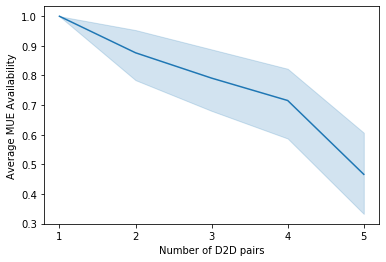

In [3]:
mue_success_rate = np.array(data['mue_success_rate'])
aux = np.ones((mue_success_rate.shape[0], np.prod(mue_success_rate.shape[1:])))
for i in range(len(aux)):
    aux[i] *= i+1
n_d2d = aux.reshape(-1)
aux2 = mue_success_rate.reshape(-1)
# dataframe
df = pd.DataFrame({'success': aux2, 'n_d2d': n_d2d})
# plot
sns.lineplot(x="n_d2d", y="success", data=df)
x_ticks = df['n_d2d'].unique()
x_ticks.sort()
plt.xticks(x_ticks)
plt.ylabel('Average MUE Availability')
plt.xlabel('Number of D2D pairs')

## MUE Spectral Efficiencies

In [4]:
data['mue_sinr_threshold']

6

Text(0.5, 0, 'Number of D2D pairs')

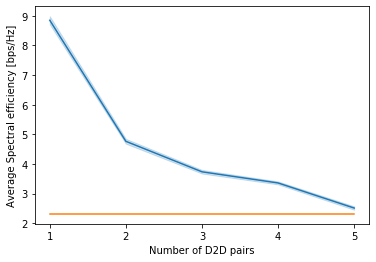

In [5]:
mue_speffs = np.array(data['mue_speffs'])
aux = np.ones((mue_speffs.shape[0], np.prod(mue_speffs.shape[1:])))
for i in range(len(aux)):
    aux[i] *= i+1
n_d2d = aux.reshape(-1)
aux2 = mue_speffs.reshape(-1)

df = pd.DataFrame({'speffs': aux2, 'n_d2d': n_d2d})
df['dummy'] = 'Spectral Efficiency'

speff_threshold = np.log2(1 + db_to_power(data['mue_sinr_threshold'])) 
baseline = speff_threshold * np.ones(mue_speffs.shape[0])

sns.lineplot(x="n_d2d", y="speffs",data=df)

plt.plot(x_ticks, baseline)
x_ticks = df['n_d2d'].unique()
x_ticks.sort()
plt.xticks(x_ticks)
plt.ylabel('Average Spectral efficiency [bps/Hz]')
plt.xlabel('Number of D2D pairs')

In [6]:
mask = mue_success_rate[4] != 1
mue_success_rate[4][mask]

array([0.86666667, 0.        , 0.74      , 0.00666667, 0.32666667,
       0.        , 0.01333333, 0.        , 0.72      , 0.08666667,
       0.09333333, 0.        , 0.        , 0.        , 0.98      ,
       0.        , 0.12      , 0.98      , 0.02      , 0.        ,
       0.        , 0.        , 0.10666667, 0.97333333, 0.00666667,
       0.00666667, 0.        , 0.03333333, 0.98666667, 0.05333333,
       0.        , 0.16666667, 0.        , 0.02      ])

In [7]:
mue_speffs[4][mask][3]

array([0.50300841, 0.4744057 , 0.90740998, 0.68317586, 0.50851604,
       0.40896578, 0.39381392, 0.4797275 , 0.74455512, 0.68249614,
       0.46336704, 0.80921322, 0.40807788, 0.50213407, 1.05811265,
       0.94629232, 0.71097879, 0.42780912, 0.72111236, 0.51992319,
       0.3903488 , 0.50338028, 0.91251822, 0.4465587 , 0.33904751,
       0.44192224, 0.66387438, 1.19140297, 0.44330681, 0.4967577 ,
       0.47625872, 0.47535112, 0.72703672, 0.54762537, 0.53630929,
       1.2897628 , 0.51684644, 0.65750947, 0.45041559, 0.63781545,
       0.57835899, 1.01233936, 0.66158469, 0.41686376, 0.80032855,
       0.51074843, 0.51115488, 0.51680216, 0.681292  , 0.70005366,
       0.96265688, 0.83459054, 0.78829009, 0.34043114, 0.58495708,
       0.41287944, 0.43009612, 0.66461039, 1.22474984, 0.45003372,
       2.40770069, 0.89392726, 0.4924568 , 0.51017653, 0.37061082,
       0.77886438, 0.68262809, 0.55057284, 0.39968916, 0.61134377,
       0.88654389, 1.3144013 , 0.37747742, 0.5850234 , 0.58447

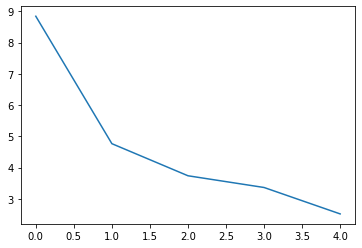

In [8]:
avgs = np.mean(mue_speffs, axis=(1,2))
plt.plot(avgs)

In [9]:
std_mue_success_rate = np.std(mue_success_rate, axis=1).tolist()
mean_mue_speffs = np.mean(mue_success_rate, axis=1).tolist()

## D2D Summed Spectral Efficiencies

Text(0.5, 0, 'Number of D2D pairs')

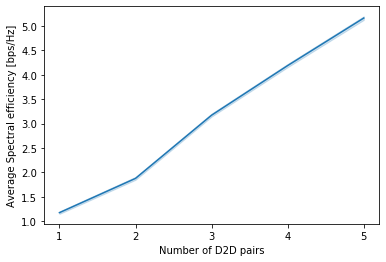

In [10]:
d2d_speffs = np.array(data['d2d_speffs'])
aux = np.ones((d2d_speffs.shape[0], np.prod(d2d_speffs.shape[1:])))
for i in range(len(aux)):
    aux[i] *= i+1
n_d2d = aux.reshape(-1)
aux2 = d2d_speffs.reshape(-1)
# dataframe
df = pd.DataFrame({'speff': aux2, 'n_d2d': n_d2d})
# plot
sns.lineplot(x="n_d2d", y="speff",data=df)
x_ticks = df['n_d2d'].unique()
x_ticks.sort()
plt.xticks(x_ticks)
plt.ylabel('Average Spectral efficiency [bps/Hz]')
plt.xlabel('Number of D2D pairs')

[1.17737471 1.87833551 3.17139358 4.1868322  5.15883224]


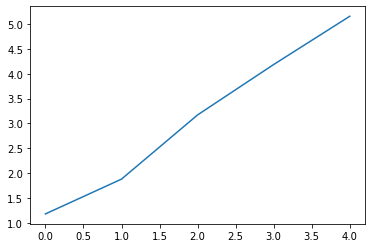

In [11]:
avgs = np.mean(d2d_speffs, axis=(1,2))
print(avgs)
plt.plot(avgs)

## Summed rewards

In [12]:
rewards = data['rewards']
plt.plot(range(1, len(mue_success_rate)+1, 1), rewards)
plt.xticks(range(1, len(mue_success_rate)+1, 1))
plt.ylabel('Average Summed Reward')
plt.xlabel('Number of D2D pairs')

ValueError: setting an array element with a sequence.